In [1]:
#載入套件及資料集

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [3]:
#資料前處理
#使用cifar10資料集(跟手寫資料大小不同)
#原本28X28>>32X32
# (#有cifar100)

In [4]:
#類別名稱
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

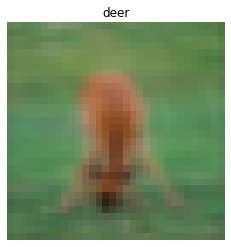

In [6]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [7]:
#建立用於分類 CIFAR 10 的卷積神經網路
#透過不同方式 重複件模型

In [8]:
#La-Net 5模型 3(2)卷基層+2(3)全連皆層
model = Sequential()

# First convolutional block
## 2d捲基層+磁化層
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

# Second convolutional block
## 2d捲基層+磁化層
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

# Third convolutional block
## 2d捲基層+磁化層
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())

# Fully-connected layers as a classfier
model.add(Dense(units=256, activation='relu'))

# Ouput layer: # of neurons = # of classes with softmax activation
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [10]:
#編譯模型: 設定模型訓練時的設定

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

In [12]:
#訓練模型: 透過訓練來學習分類資料的函數

In [13]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=3,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 453s 9ms/sample - loss: 1.7717 - categorical_accuracy: 0.3319 - val_loss: 1.6205 - val_categorical_accuracy: 0.4029
Epoch 2/3
50000/50000 [==============================] - 448s 9ms/sample - loss: 1.4349 - categorical_accuracy: 0.4732 - val_loss: 1.4593 - val_categorical_accuracy: 0.4553
Epoch 3/3
50000/50000 [==============================] - 462s 9ms/sample - loss: 1.2634 - categorical_accuracy: 0.5409 - val_loss: 1.1761 - val_categorical_accuracy: 0.5798


In [14]:
model.save_weights('LeNet5_CIFAR10.h5')

In [15]:
model.load_weights('LeNet5_CIFAR10.h5')

score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 31s 3ms/sample - loss: 1.1761 - categorical_accuracy: 0.5798s - l
Train Accuracy: 58.160001039505005
Test Accuracy: 57.9800009727478


In [16]:
model.layers

In [17]:
#另一種使用 Sequential 建立模型的方式
#用list的方式
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [18]:
CNN_layers + FC_layers

In [19]:
#跟下面的model比較
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [20]:
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [21]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

model_2.load_weights('LeNet5_CIFAR10.h5')

In [23]:
score_train = model_2.evaluate(X_train, y_train, batch_size=1024)
score_test = model_2.evaluate(X_test, y_test, batch_size=1024)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 28s 3ms/sample - loss: 1.1761 - categorical_accuracy: 0.5798
Train Accuracy: 58.160001039505005
Test Accuracy: 57.9800009727478


In [24]:
#遷移學習 (Transfer Learning)

In [25]:
# 引進新的資料集 cifar100
# "種類"數量不同
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

In [26]:
FC_layers_CF100 = [Dense(units=256, activation='relu'),
                   Dense(units=128, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [27]:
model_CF100 = Sequential(CNN_layers+FC_layers_CF100)
model_CF100.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [28]:
#訓練新模型
#Fine-tune: 新資料集的樣本數夠多，整個模型重新訓練
#Frozen: 當新資料集的樣本數不夠多，凍結借來的部分，只針對新建立的神經網路層訓練

In [29]:
for layer in CNN_layers:
    layer.trainable = False

In [30]:
model_CF100.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

model_CF100.fit(U_train, v_train,
                batch_size=128, 
                epochs=5,
                validation_data=(U_test, v_test)
                )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 174s 3ms/sample - loss: 3.8162 - categorical_accuracy: 0.1145 - val_loss: 3.4772 - val_categorical_accuracy: 0.1603
Epoch 2/5
50000/50000 [==============================] - 173s 3ms/sample - loss: 3.3472 - categorical_accuracy: 0.1874 - val_loss: 3.2825 - val_categorical_accuracy: 0.1994
Epoch 3/5
50000/50000 [==============================] - 171s 3ms/sample - loss: 3.1864 - categorical_accuracy: 0.2151 - val_loss: 3.1497 - val_categorical_accuracy: 0.2211
Epoch 4/5
50000/50000 [==============================] - 171s 3ms/sample - loss: 3.0838 - categorical_accuracy: 0.2369 - val_loss: 3.0613 - val_categorical_accuracy: 0.2476
Epoch 5/5
50000/50000 [==============================] - 171s 3ms/sample - loss: 3.0130 - categorical_accuracy: 0.2514 - val_loss: 2.9974 - val_categorical_accuracy: 0.2509


In [31]:
score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 30s 3ms/sample - loss: 1.1761 - categorical_accuracy: 0.5798
Train Accuracy: 58.160001039505005
Test Accuracy: 57.9800009727478
